In [4]:
import pandas as pd

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mysql.connector

# Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="root")

In [3]:
query = "SELECT * FROM banking_case.customer"

In [5]:
df = pd.read_sql(query, cnx)

C:\Users\MUTHU GOKUL\AppData\Local\Temp\ipykernel_9036\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [6]:
import matplotlib.pyplot as plt


In [11]:
df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

<Axes: xlabel='Amount of Credit Cards'>

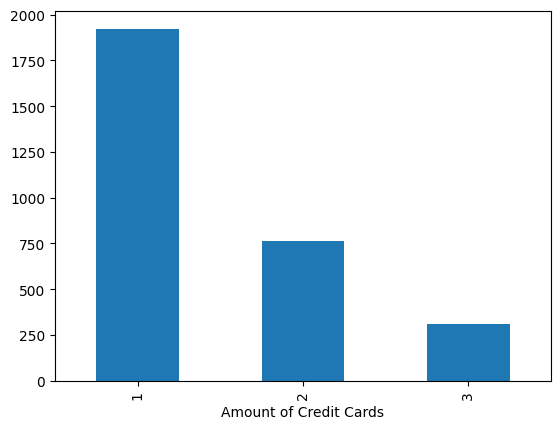

In [30]:
df["Amount of Credit Cards"].value_counts().plot(kind = "bar")

In [8]:
import seaborn as sns

In [25]:
df.shape

(3000, 25)

In [28]:
df['Estimated Income'].max()

522330.26

<Axes: xlabel='income_band'>

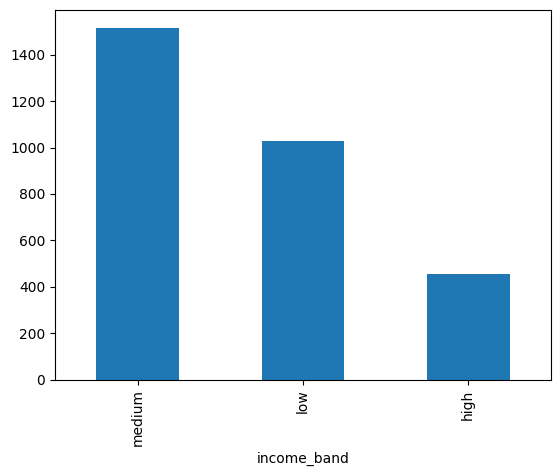

In [11]:
bins = [0, 100000, 300000, float('inf')]
labels = ["low", "medium", "high"]

df['income_band'] = pd.cut(df["Estimated Income"], bins = bins, labels = labels, right = False)

df['income_band'].value_counts().plot(kind = "bar")

In [14]:
#Examine the distribution of unique categories in caregorical columns
categorical_cols = df[["BRId", "GenderId","IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned","Risk Weighting", "income_band"]].columns

for col in categorical_cols :
    print(f"value count for {col}:")
    display(df[col].value_counts())

value count for BRId:


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

value count for GenderId:


GenderId
2    1512
1    1488
Name: count, dtype: int64

value count for IAId:


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

value count for Amount of Credit Cards:


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

value count for Nationality:


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

value count for Occupation:


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

value count for Fee Structure:


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

value count for Loyalty Classification:


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

value count for Properties Owned:


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

value count for Risk Weighting:


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

value count for income_band:


income_band
medium    1517
low       1027
high       456
Name: count, dtype: int64

In [ ]:
categorical_cols.head()

# Bivariate Analysis

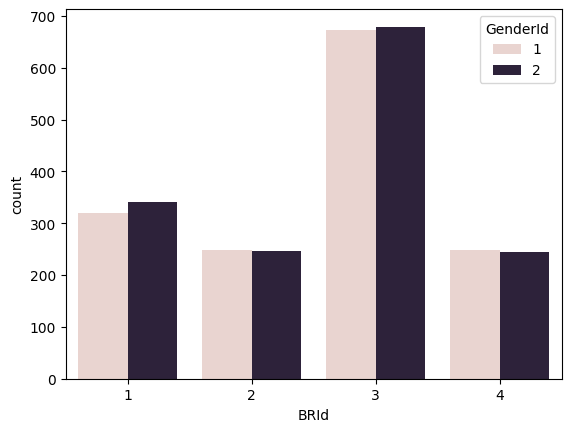

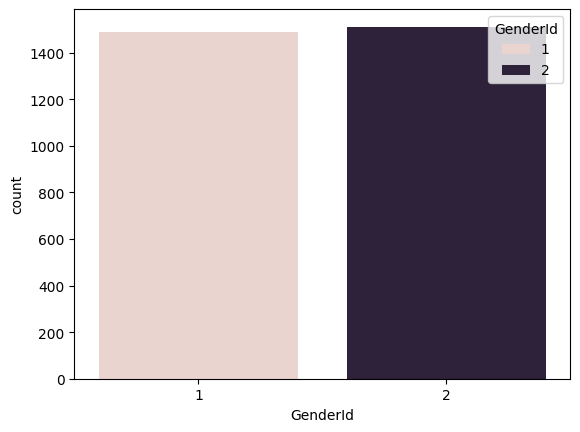

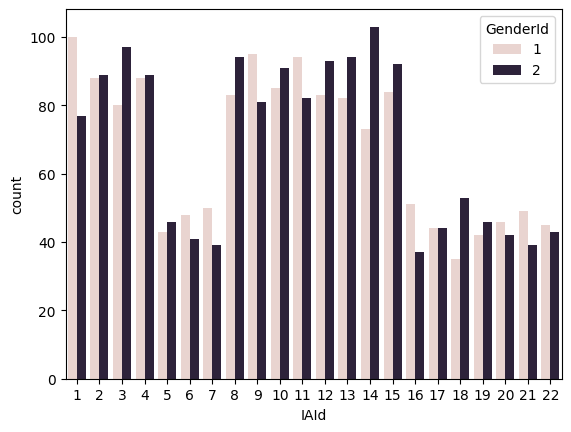

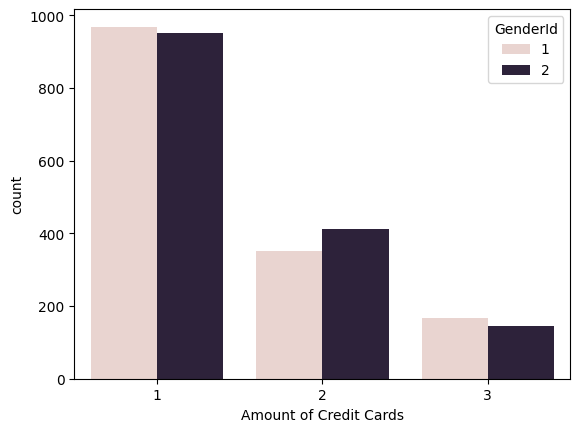

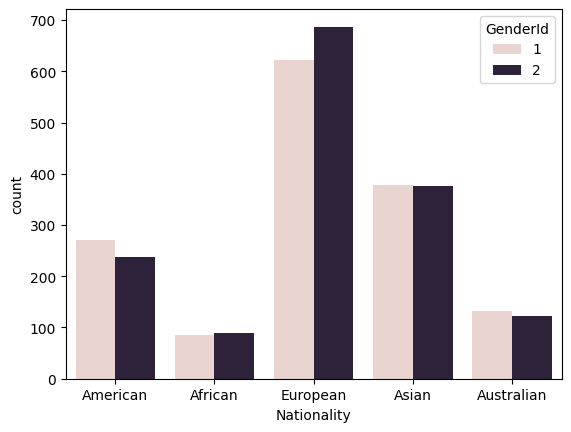

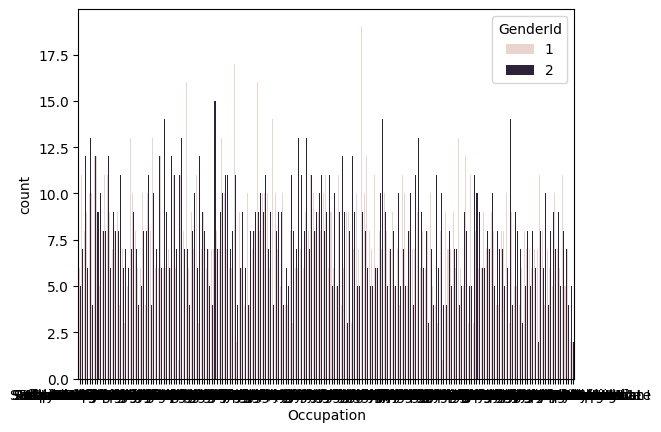

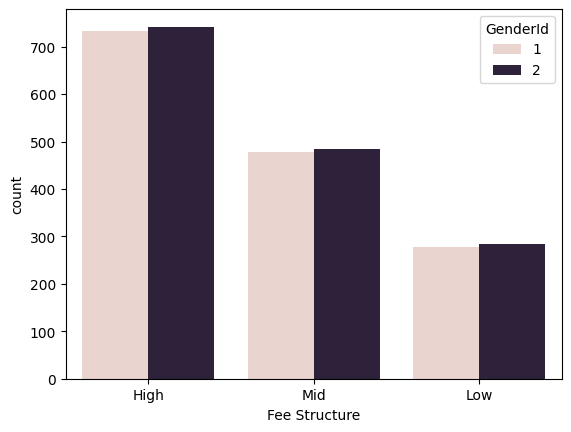

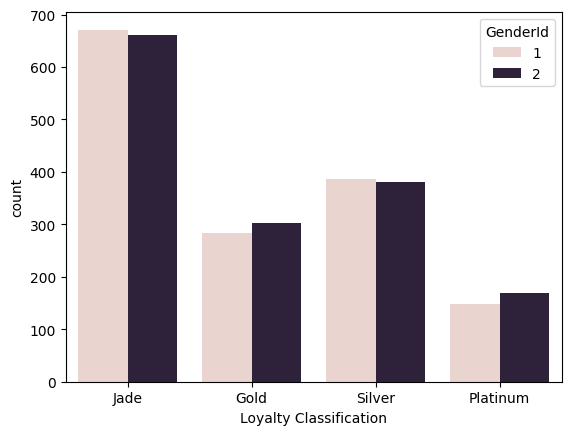

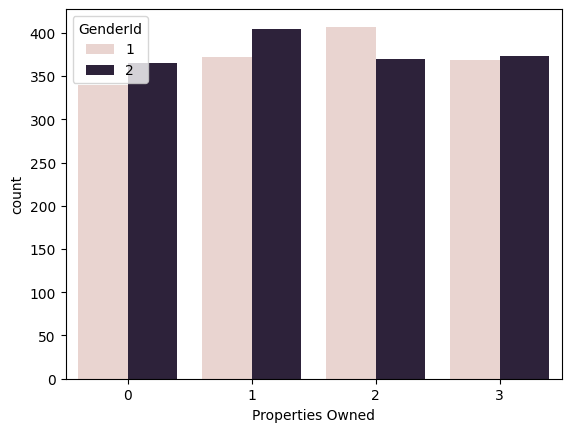

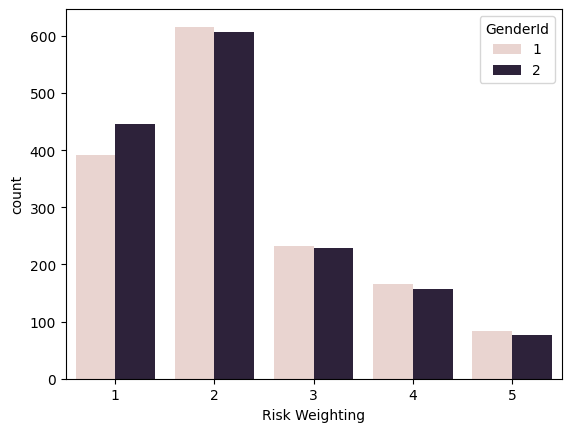

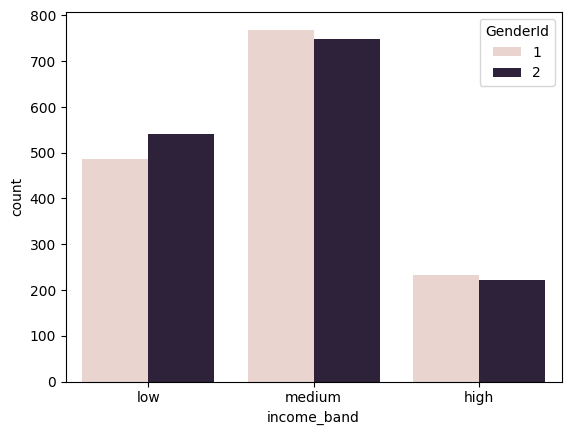

In [12]:
for i,predictor in enumerate(["BRId", "GenderId","IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned","Risk Weighting", "income_band"]) :
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue= "GenderId")

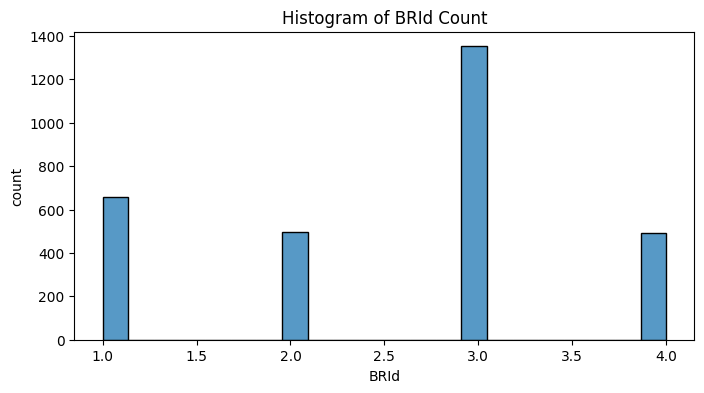

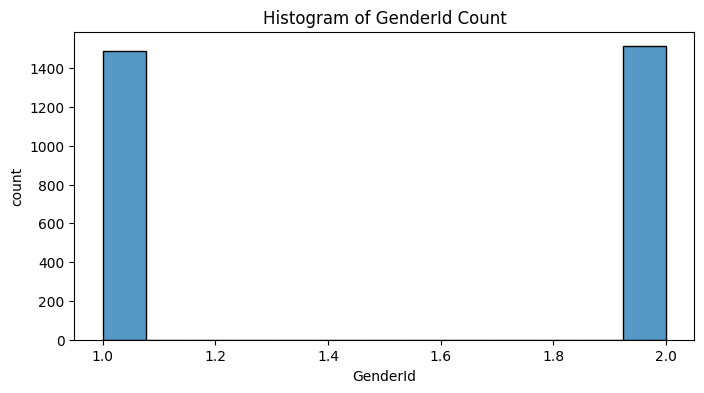

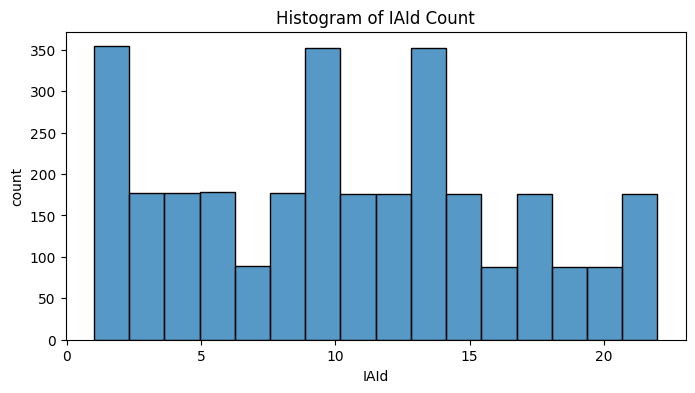

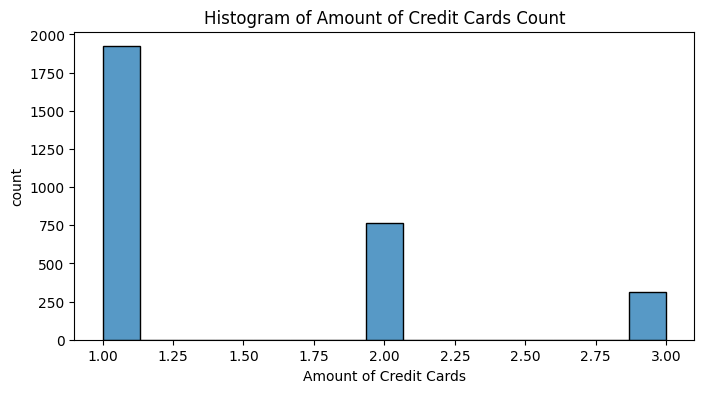

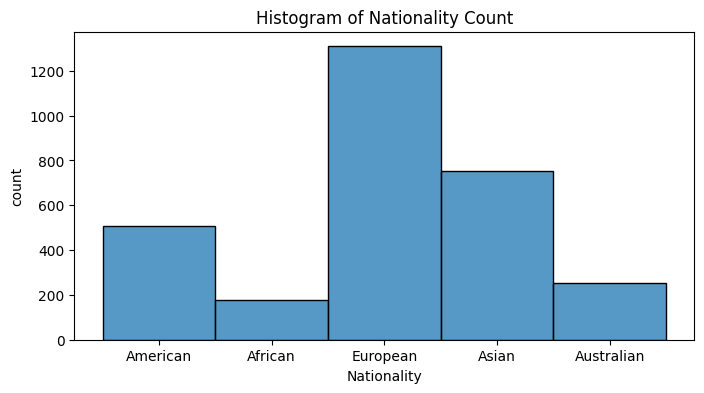

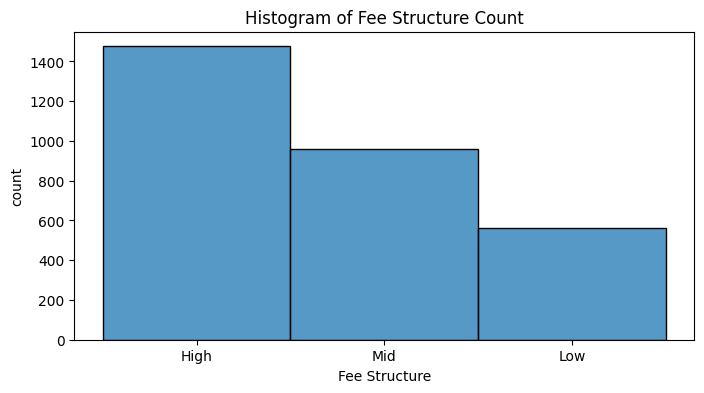

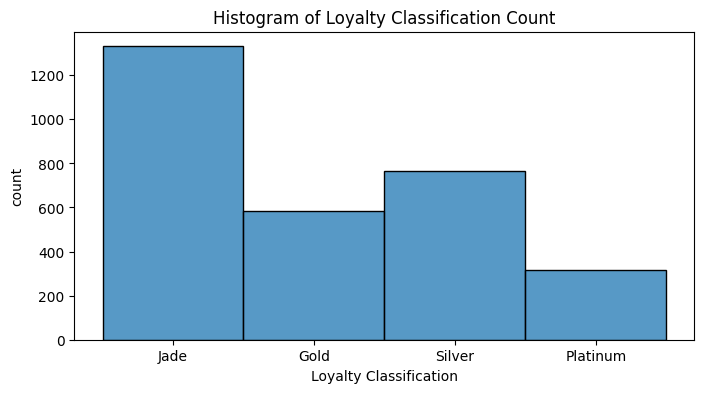

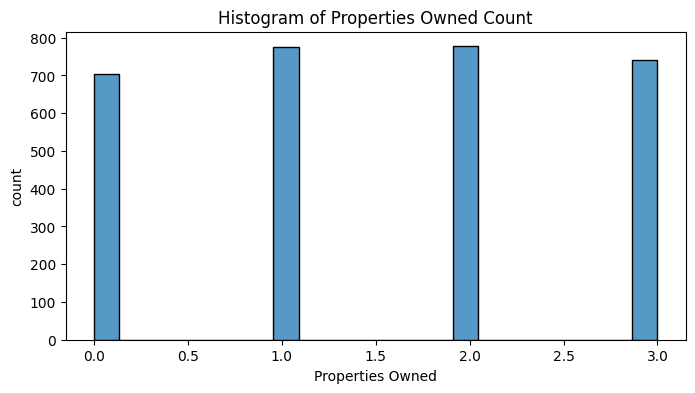

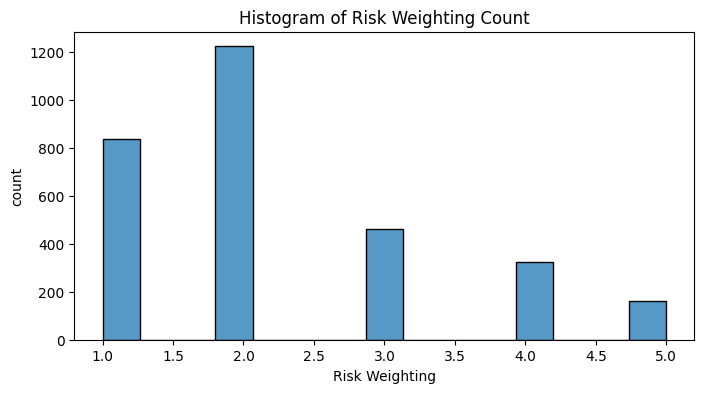

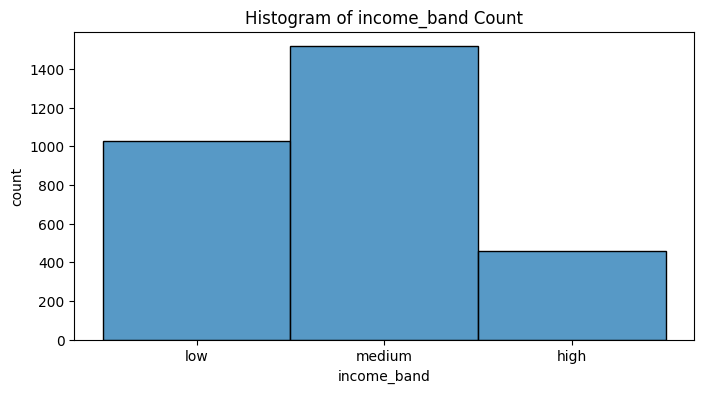

In [20]:
#Histplot of the value counts for different occupation

for col in categorical_cols:
    if col == "Occupation" :
        continue
    plt.figure(figsize = (8,4))
    plt.title(f"Histogram of {col} Count")
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

# Numerical Analysis

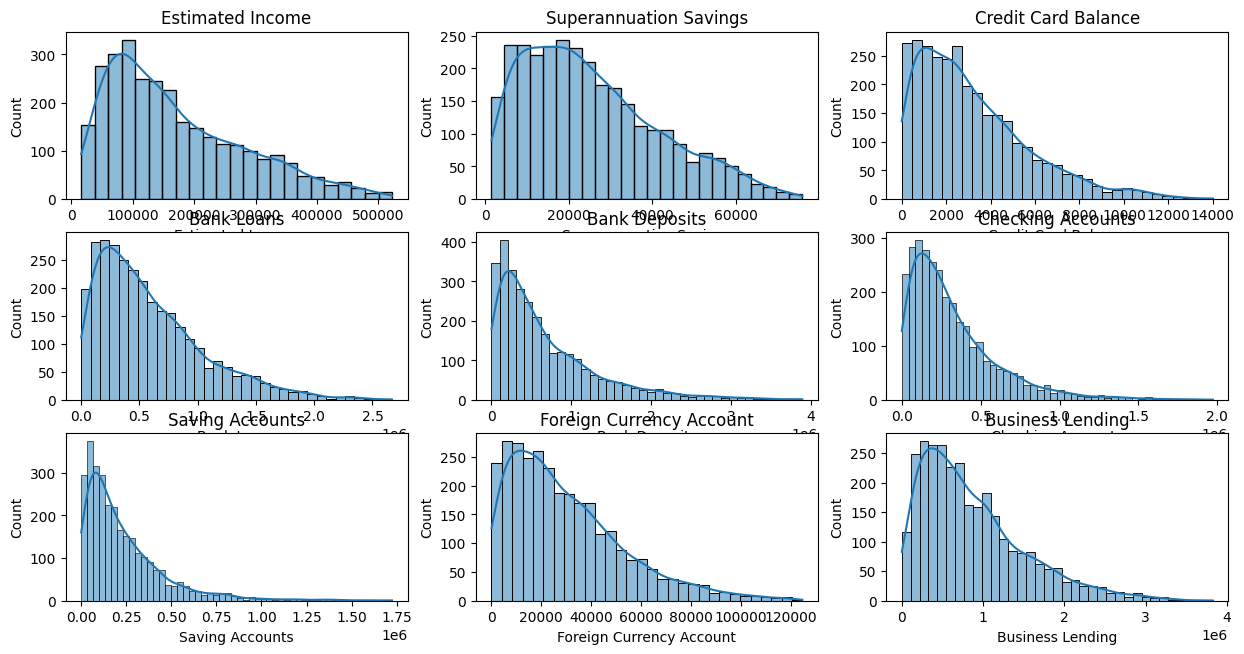

In [26]:
numerical_cols = ["Estimated Income", "Superannuation Savings","Credit Card Balance","Bank Loans","Bank Deposits","Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending"]
plt.figure(figsize = (15, 10))

for i,col in enumerate(numerical_cols) :
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde = True)
    plt.title(col)
plt.show()

# Heatmaps

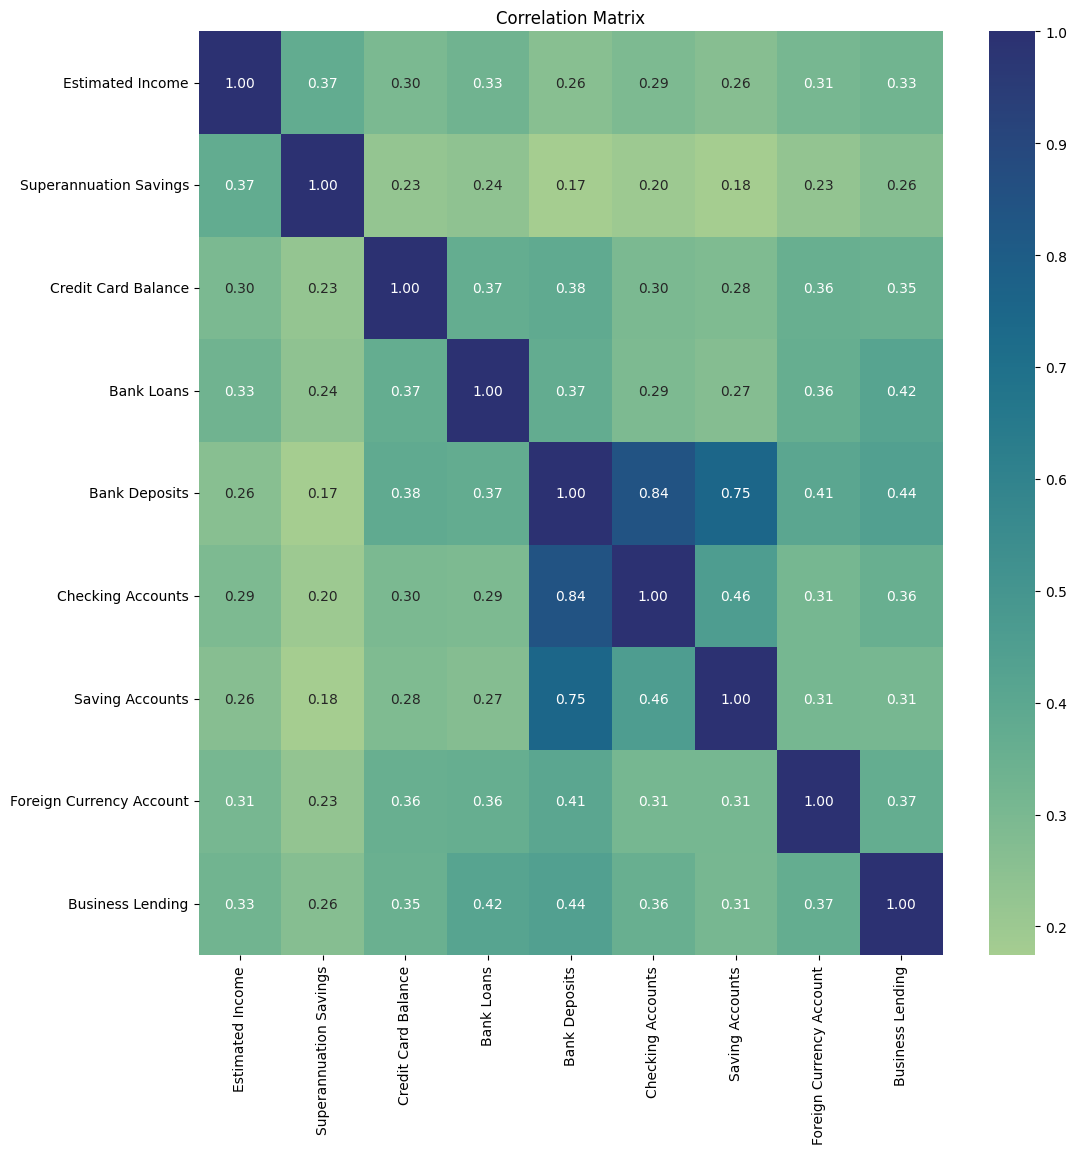

In [29]:
numerical_cols = ["Estimated Income", "Superannuation Savings","Credit Card Balance","Bank Loans","Bank Deposits","Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending"]

corelation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corelation_matrix, annot = True, cmap = 'crest', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Insights of EDA :

1. The Strongest Postive Correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts" and "Foreign Currency Account" indicating that customers who maintain high balance in one account type often hold substantial amount/funds across other accounts as well

In [30]:
git init


SyntaxError: invalid syntax (3277417328.py, line 1)